# PENTING DAN MOHON PERHATIAN

Pada Preprocessing kode ini menggunakan 2 STOPWORDS, yaitu Stopwords bahasa Indonesia dan Stopwords bahasa Inggris. 

Langkah-langkah mengerjakan:
1. Run Preprocessing kode menggunakan stopwords Bahasa Indonesia terlebih dahulu, run sampai selesai

2. Run Preprocessing kode menggunakan stopwords Bahasa Inggris, dan run sampai selesai

Istilah korpus (corpus) digunakan untuk menjelaskan sekumpulan dokumen, baik
berbentuk tulisan atau lisan, yang disimpan dan diproses di dalam komputer untuk
tujuan penyelidikan dan penelitian. Tujuan pembuatan korpus antara
lain sebagai data training untuk aplikasi NLP (part-of-speech taggers dan parsers,
speech recognizers, sistem terjemahan), sumber data untuk penelitian leksikal, optimasi
mesin pencarian, studi literatur, dan kebutuhan khusus lainnya

# Analisa Sentimen menggunakan Algoritma Logistic Regression

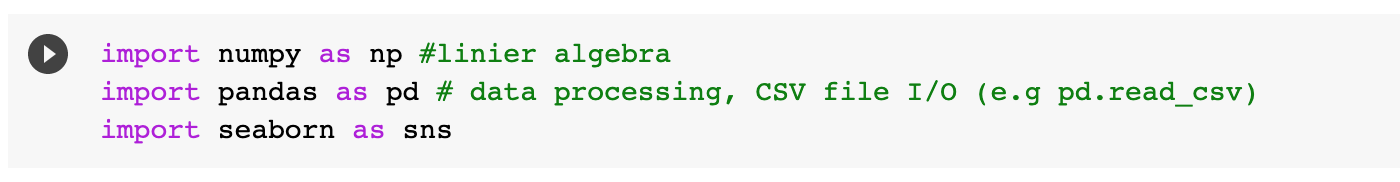

In [ ]:
 import numpy as np 
 import pandas as pd
 import seaborn as sns

# Proses 1 (Input Data Training)

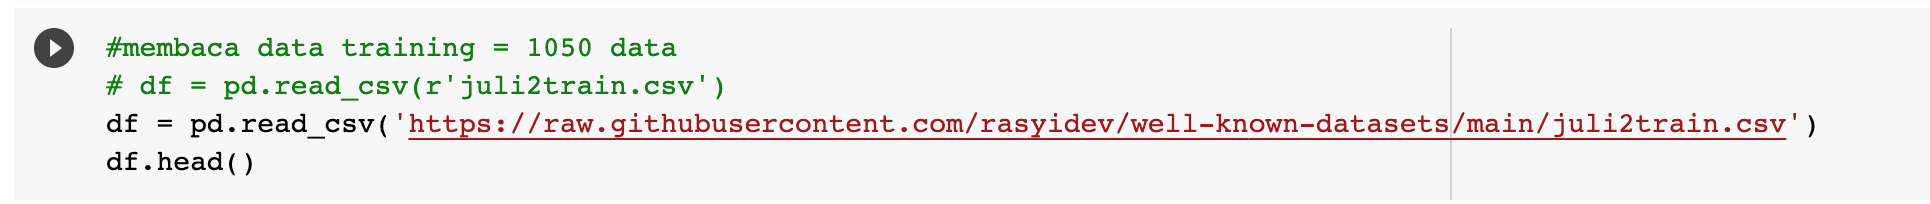

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df.head()

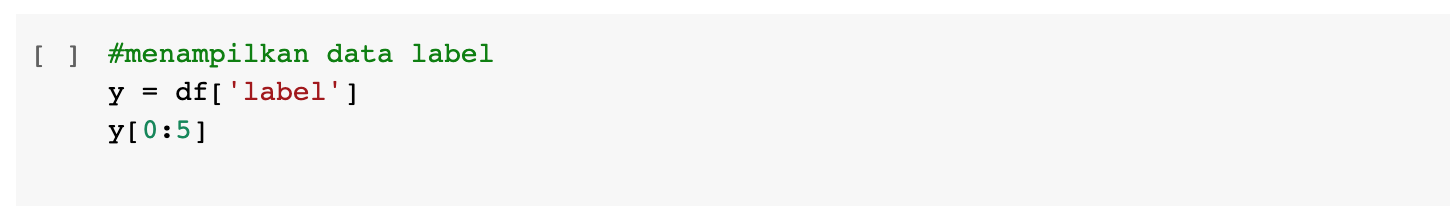

In [32]:
 y = df['label']
 y[0:5]

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

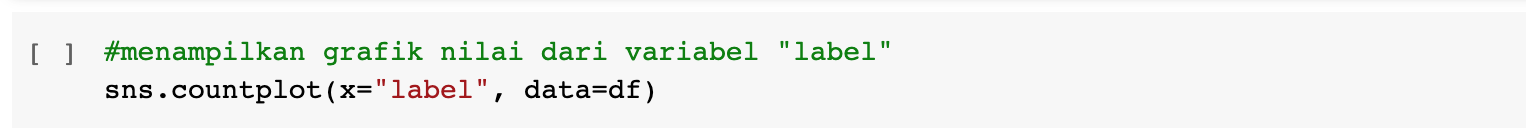

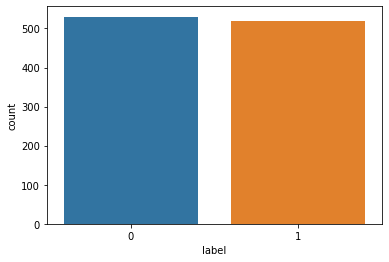

In [33]:
 sns.countplot(x="label",data=df)

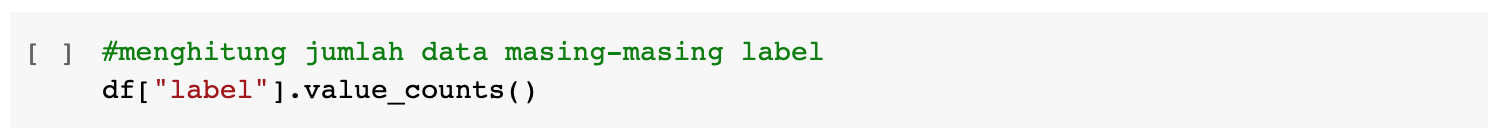

In [34]:
 df["label"].value_counts()

0    530
1    520
Name: label, dtype: int64

# Proses 2 (preprocessing, case folding, stopword removal, steming )

# Preprocessing

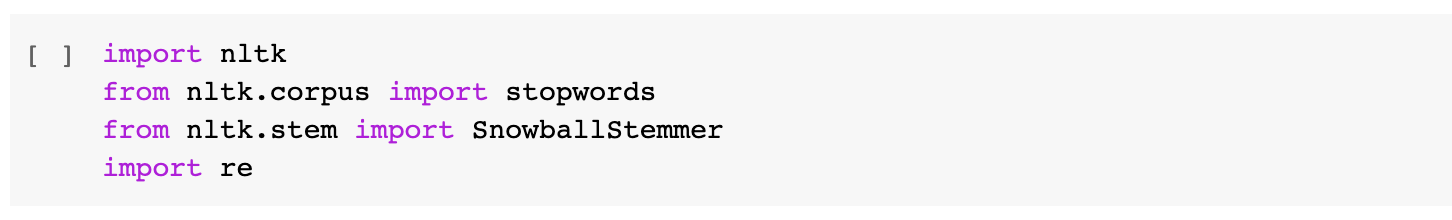

In [35]:
 import nltk
 from nltk.corpus import stopwords
 from nltk.stem import SnowballStemmer
 import re

# 1. Preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

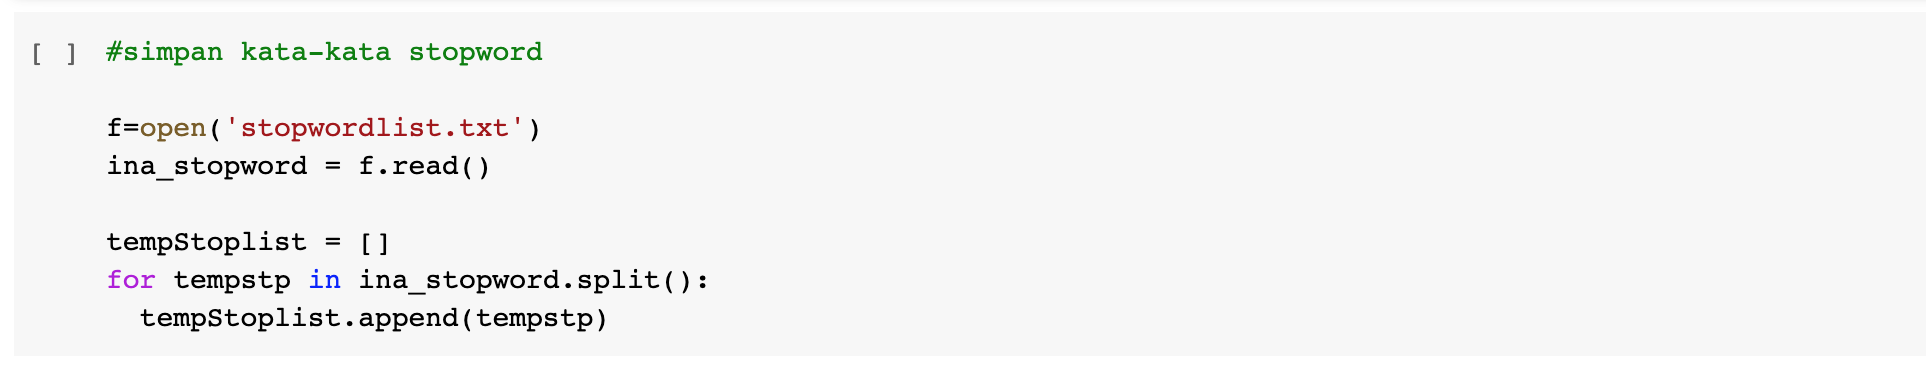

In [36]:
 f=open('stopwordlist.txt')
 ina_stopword = f.read()

 temStoplist =[]
 for tempstp in ina_stopword.split():
   temStoplist.append(tempstp)

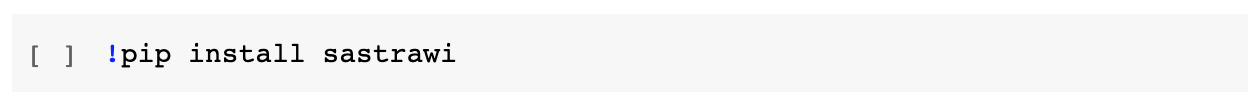

In [37]:
 !pip install sastrawi

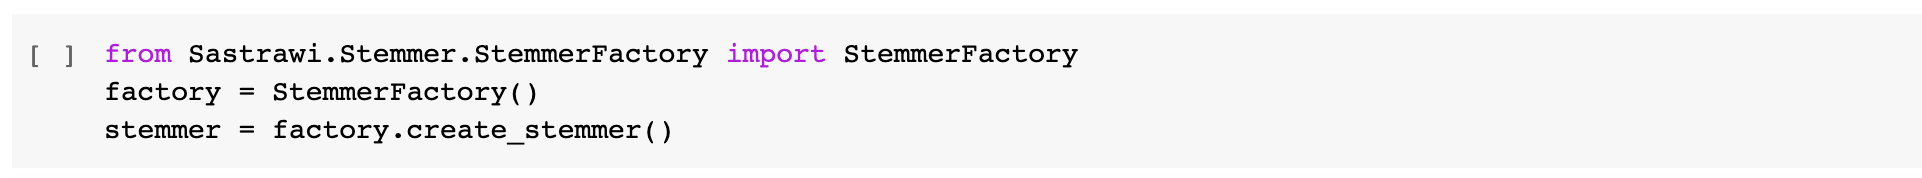

In [38]:
 from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 factory = StemmerFactory()
 stemmer = factory.create_stemmer()

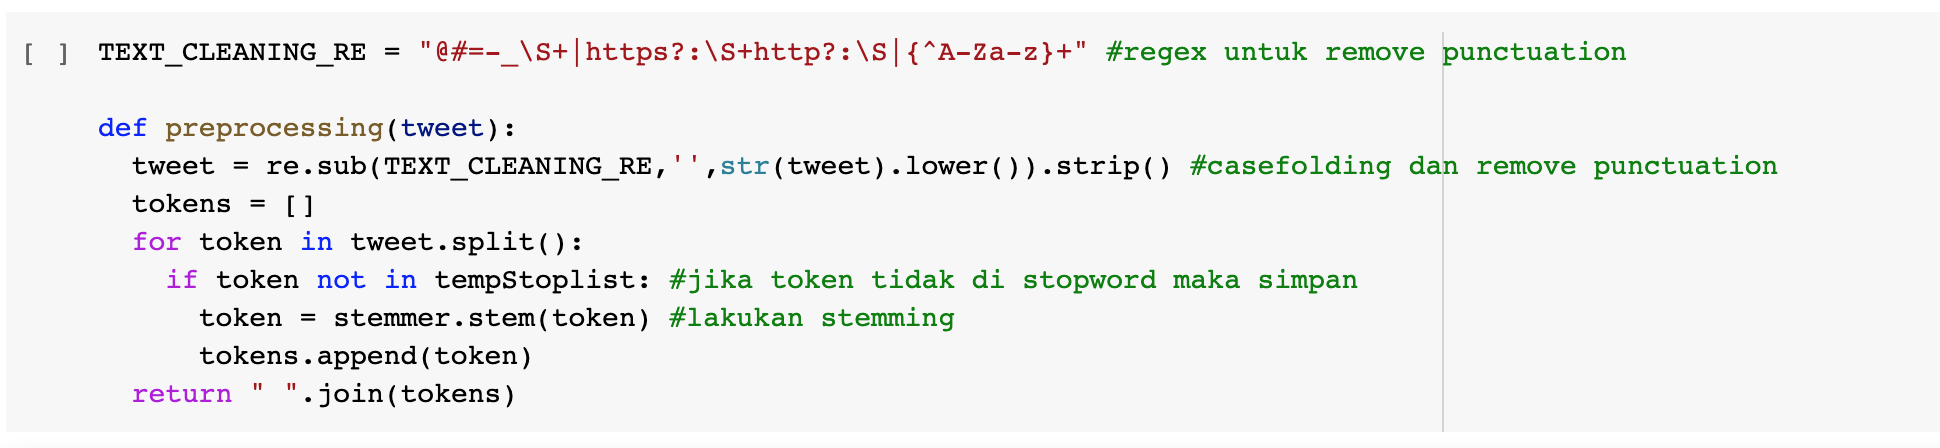

In [39]:
 TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"

 def preprocessing(tweet):
   tweet = re.sub(TEXT_CLEANING_RE,'',str(tweet).lower()).strip()
   tokens =[]
   for  token in tweet.split():
     if token not in temStoplist:
       token = stemmer.stem(token)
       tokens.append(token)
   return " ".join(tokens)

# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

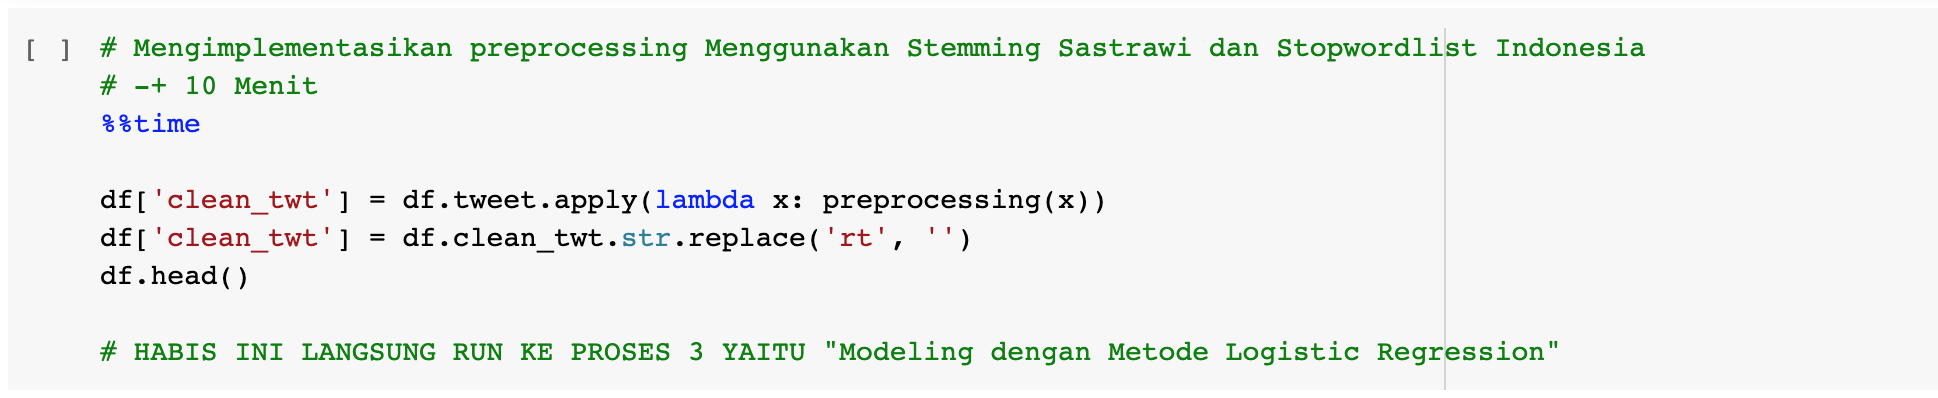

In [40]:
 #-+ 10 Menit
 %%time

df['clean_twt'] = df.tweet.apply(lambda x: preprocessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt','')
df.head()

CPU times: user 5min 22s, sys: 909 ms, total: 5min 23s
Wall time: 5min 41s


Nahh, disini dalam proses preprocessing memakan waktu yang lama, yaitu sekitar 5 menit.

# 2. Preprocessing Menggunakan Stemming English dan Stopwordlist English

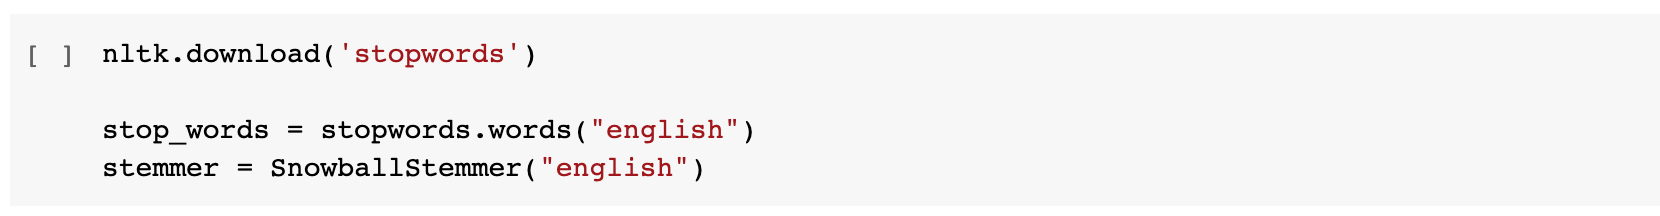

In [41]:
 nltk.download('stopwords')

 stop_words =stopwords.words("english")
 stemmer =SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


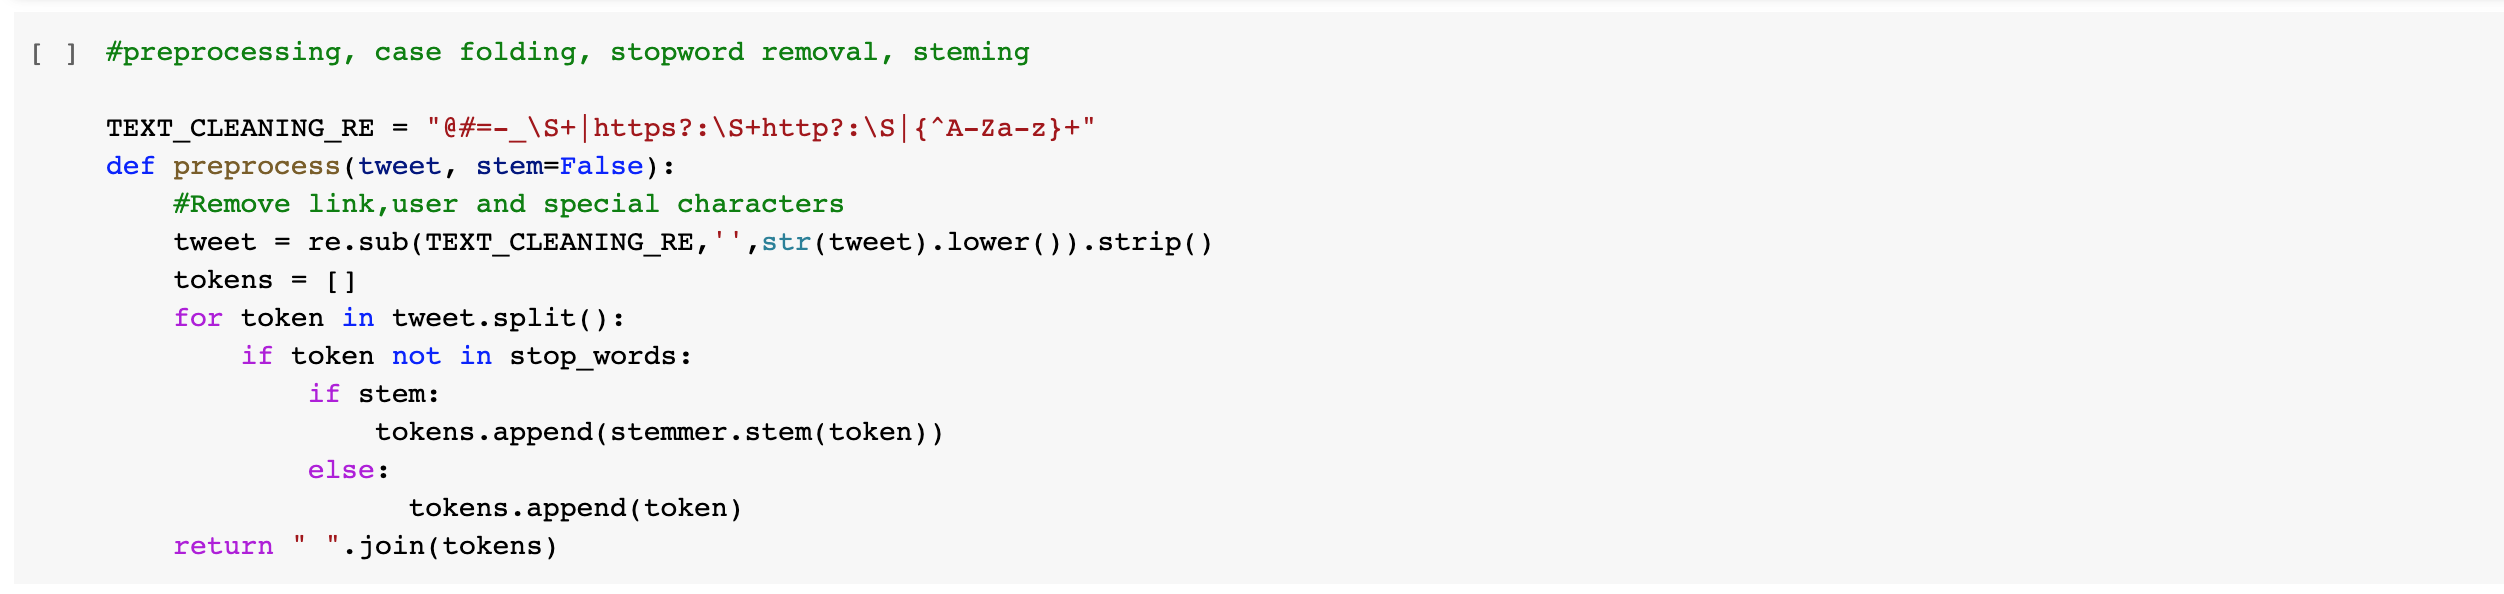

In [42]:

TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"
def preprocess(tweet, stem=False):

   tweet = re.sub(TEXT_CLEANING_RE,'',str(tweet).lower()).strip()
   tokens =[]
   for token in tweet.split():
     if token not in stop_words:
       if stem:
          tokens.append(stemmer.stem(token))
       else:
             tokens.append(token)
   return " ".join(tokens)

Mengimplementasikan preprocessing dengan Menggunakan Stemming English dan Stopwordlist English

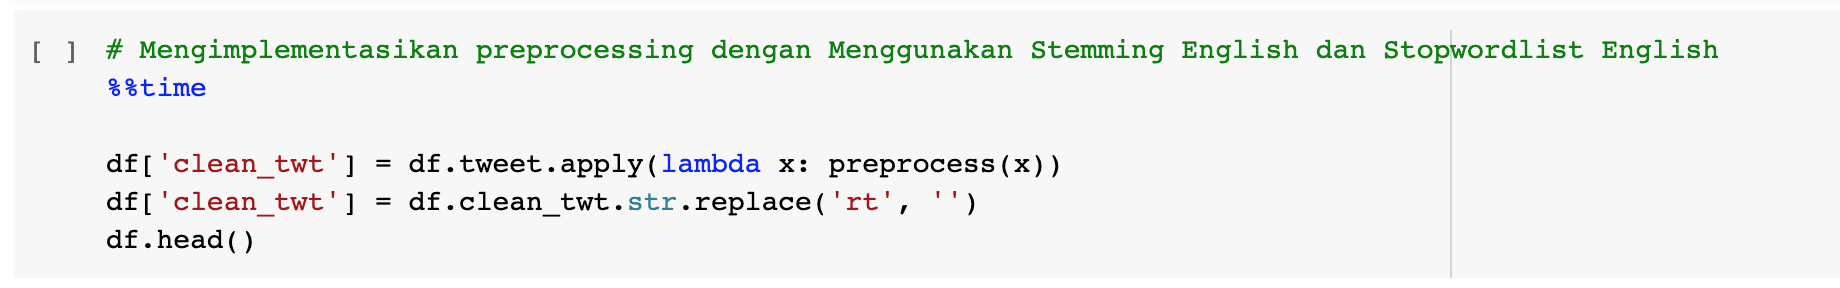

In [43]:
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprocessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

CPU times: user 482 ms, sys: 3.01 ms, total: 485 ms
Wall time: 485 ms


In [44]:
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprocessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

CPU times: user 471 ms, sys: 3 ms, total: 474 ms
Wall time: 476 ms


Dan, disini dengan menggunakan stopwords bahasa Inggris waktu preprocessing 

# Proses 3 (Modeling dengan Metode Logistic Regression)

# Logistic Regression

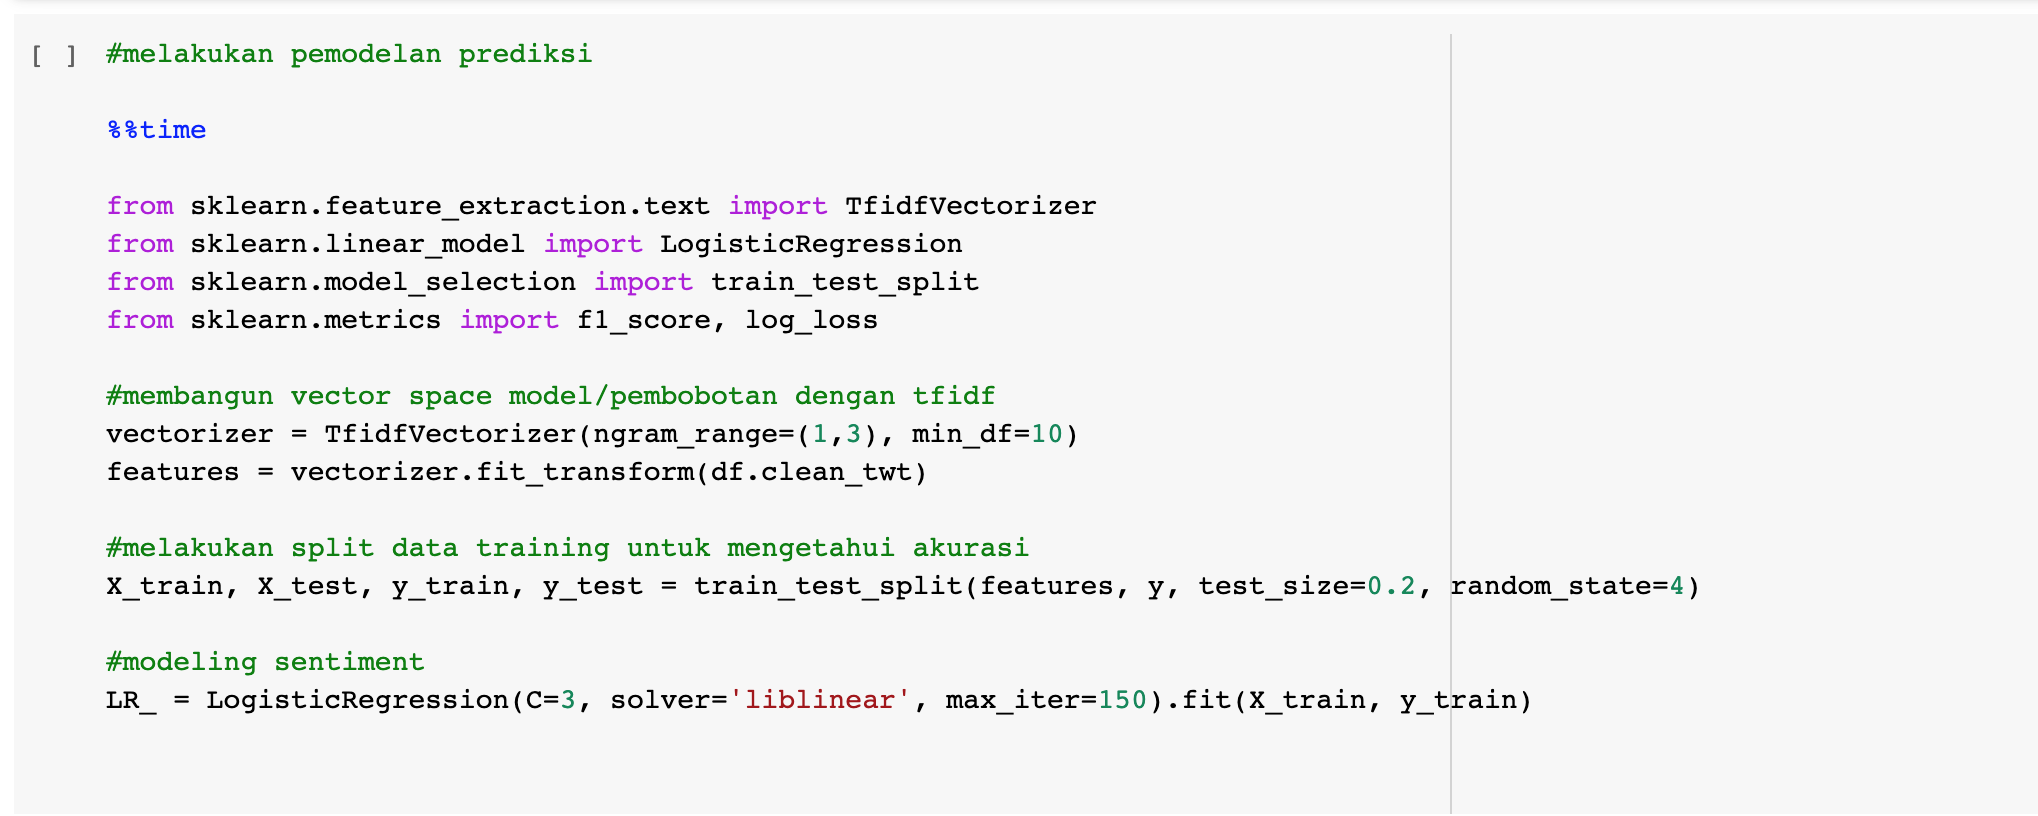

In [45]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss

vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(df.clean_twt)

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=4)
LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(x_train, y_train)

CPU times: user 49.2 ms, sys: 3.01 ms, total: 52.2 ms
Wall time: 52.2 ms


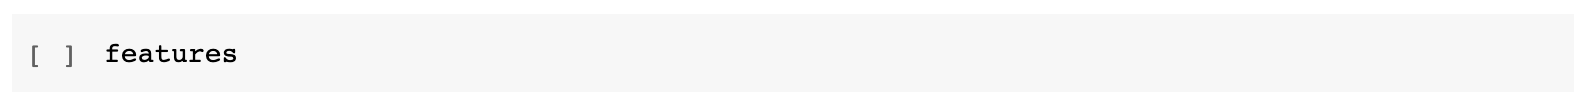

In [46]:
features

<1050x544 sparse matrix of type '<class 'numpy.float64'>'
	with 13126 stored elements in Compressed Sparse Row format>

# Proses 4 (Evaluation)

# Evaluation

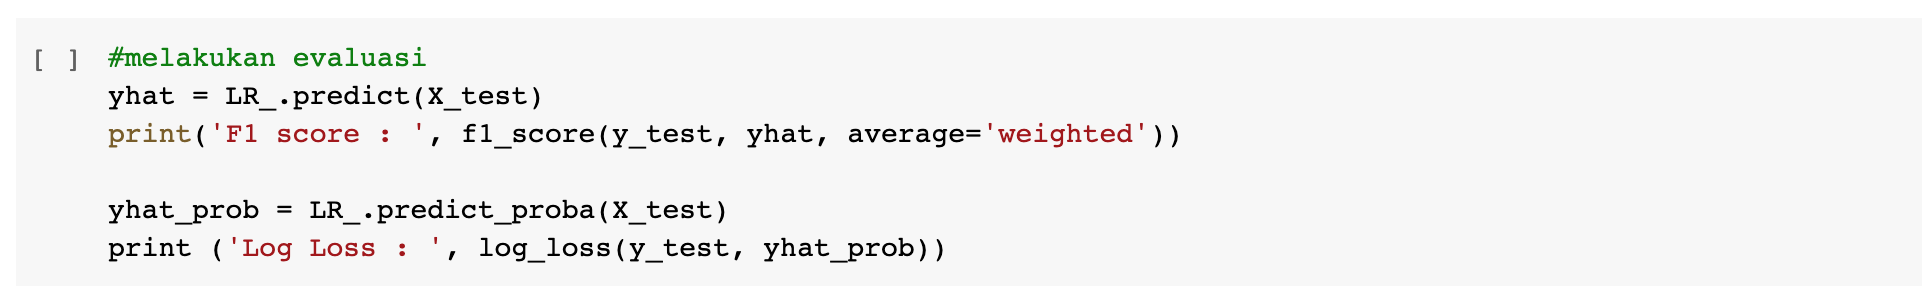

In [47]:
yhat = LR_.predict(X_test)
print('F1 score : ', f1_score(y_test, yhat, averange='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print('Log Loss : ', log_loss,(y_test, yhat_prob))

NameError: ignored

# Proses 5 (End Process : Prediction of Data Testing)

# Testing Prediksi

# Prediction

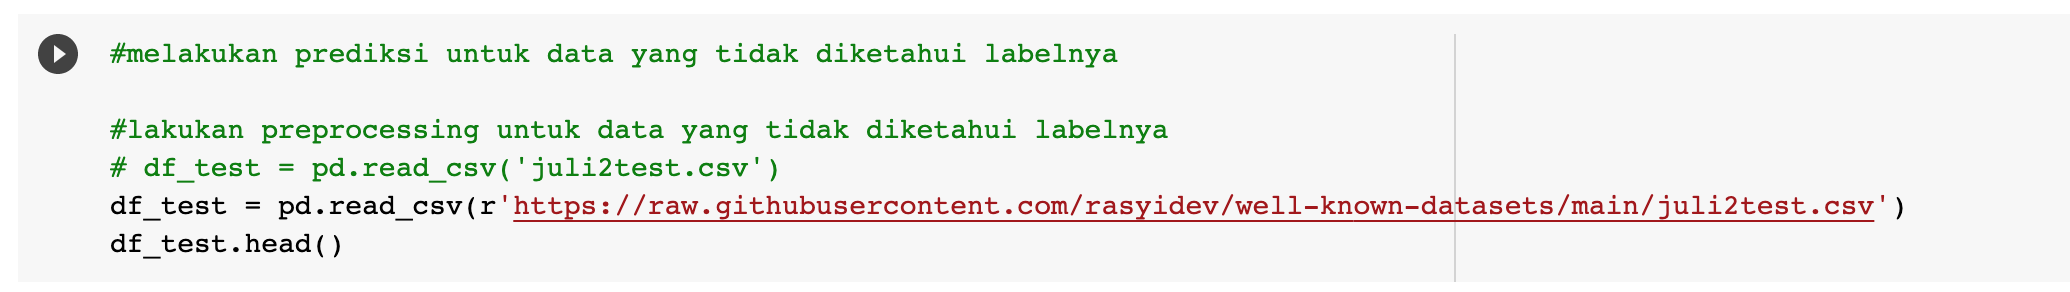

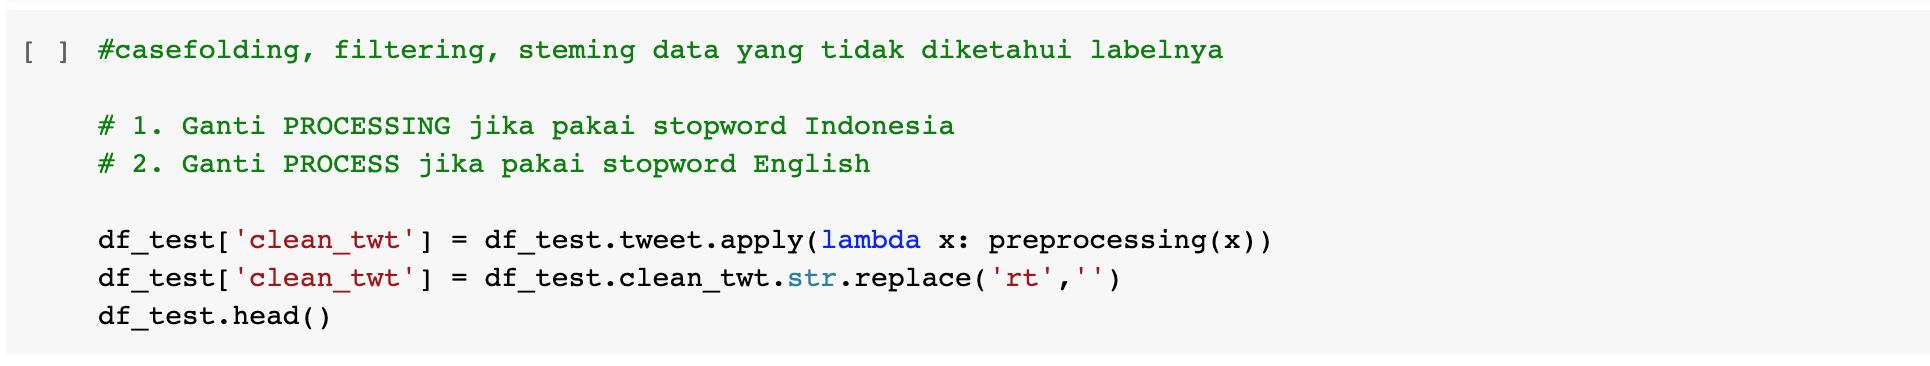

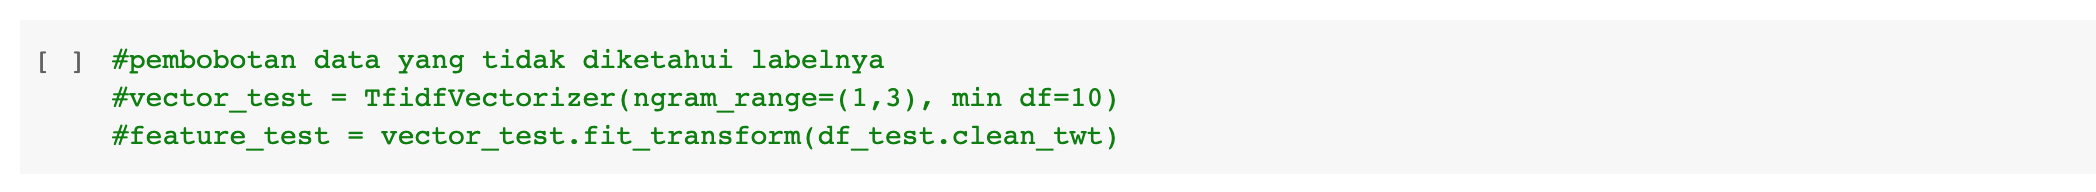

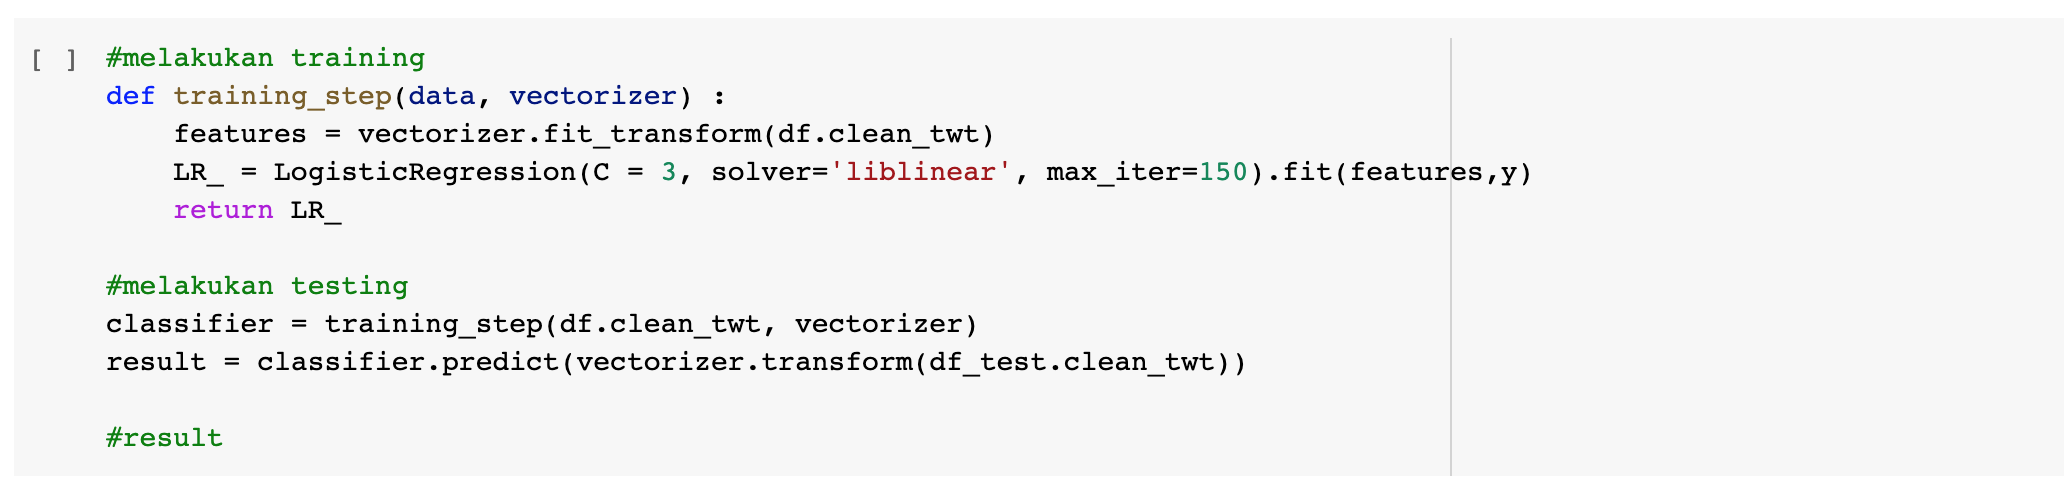

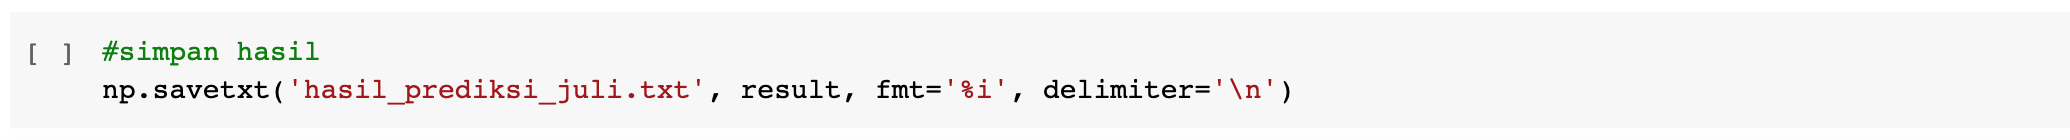

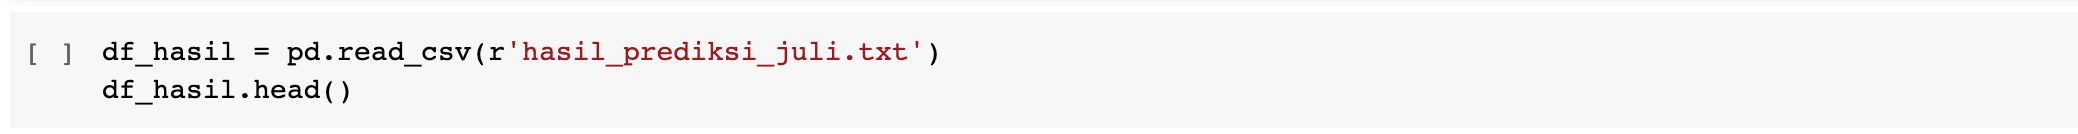

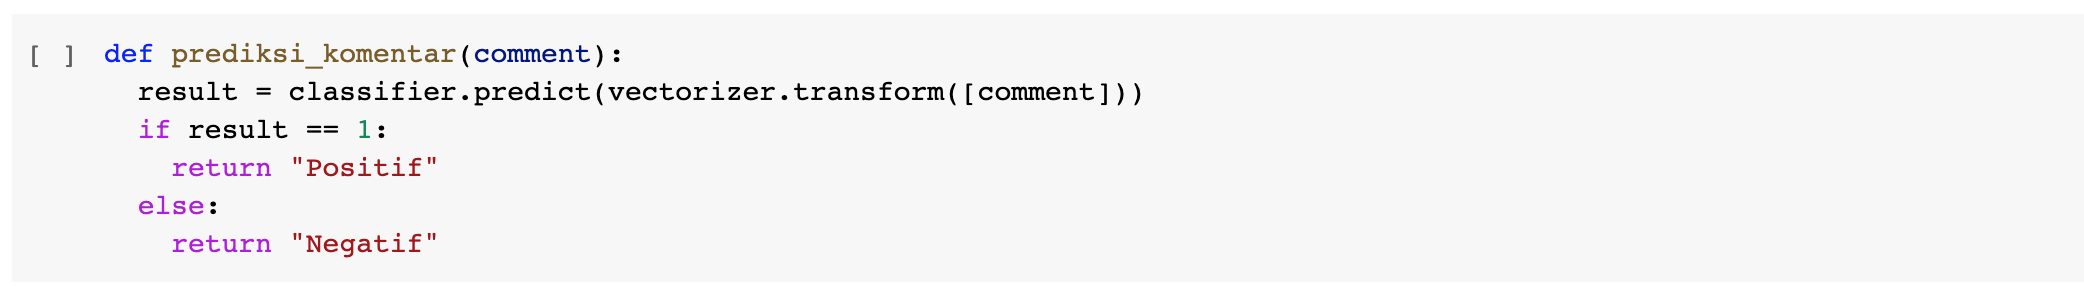

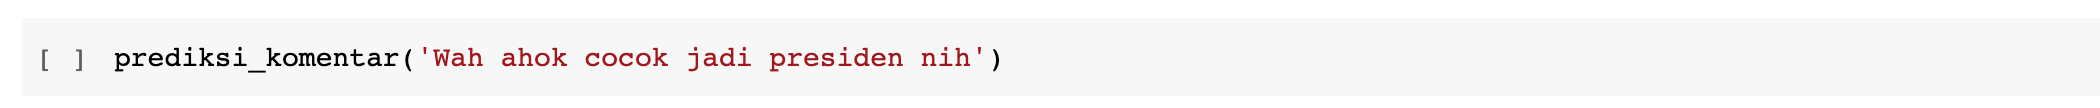